In [28]:
# Run magic commands first

%load_ext autoreload
%autoreload 2
%cd ..

/Users/kevinvu/Root/Projects/housing-nyc


# Goal: create walk network

## Attempt with urbanaccess

In [1]:
import urbanaccess

In [4]:
bbox = (-74.258843,40.476578,-73.700233,40.91763)
walk_nodes, walk_edges = urbanaccess.osm.load.ua_network_from_bbox(bbox=bbox, remove_lcn=True)

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Use GeoDataFrame.set_geometry to set the active geometry column.

urbanaccess walk network bbox is broken due to geodataframe. try osmnx

## Attempt with osmnx

In [1]:
import osmnx as ox

In [2]:
def bbox_ox(bbox):
    lng_max, lat_min, lng_min, lat_max = bbox
    return (lat_max, lat_min, lng_min, lng_max)

In [ ]:
G = ox.graph_from_place("Manhattan, New York City")
G_proj = ox.project_graph(G)
ox.plot_graph(G_proj)

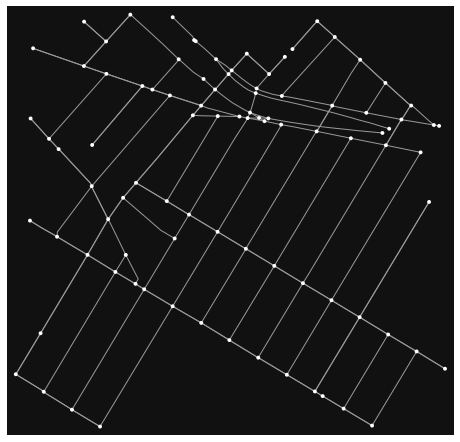

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
bbox = (-73.923474,40.762872,-73.911279,40.77209) # (-122.432395,37.776648,-122.410755,37.790351)
G_drive = ox.graph_from_bbox(*bbox_ox(bbox), network_type='drive')
G_drive_proj = ox.project_graph(G_drive)
ox.plot_graph(G_drive_proj)

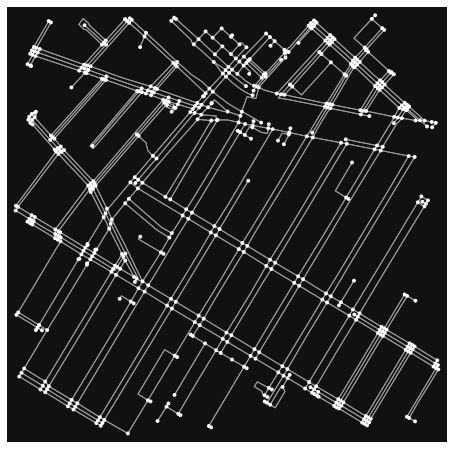

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [6]:
bbox = (-73.923474,40.762872,-73.911279,40.77209)
G_walk = ox.graph_from_bbox(*bbox_ox(bbox), network_type='walk')
G_walk_proj = ox.project_graph(G_walk)
ox.plot_graph(G_walk_proj)

### explore walk network

In [10]:
G_walk.edges

OutMultiEdgeView([(65281835, 65281838, 0), (65281835, 65303554, 0), (65281835, 65303553, 0), (65281838, 65281835, 0), (65282081, 5287405683, 0), (65282081, 65282083, 0), (65282081, 2253307467, 0), (65282083, 65282130, 0), (65282083, 65282081, 0), (65282083, 4788000738, 0), (65282130, 65282133, 0), (65282130, 65282083, 0), (65282130, 65282140, 0), (65282133, 5287385331, 0), (65282133, 65282130, 0), (65282133, 65285504, 0), (65282136, 9728474835, 0), (65282136, 601280673, 0), (65282136, 5287385331, 0), (65282140, 9728474834, 0), (65282140, 65282130, 0), (65282140, 65285504, 0), (65282144, 9728474834, 0), (65282144, 9728390484, 0), (65282144, 3838235851, 0), (65285109, 5429030150, 0), (65285109, 65308289, 0), (65285109, 65350752, 0), (65285414, 5287406030, 0), (65285414, 5287405682, 0), (65285414, 5287405684, 0), (65285414, 5287405689, 0), (65285501, 5287385338, 0), (65285501, 9728390502, 0), (65285501, 5287385332, 0), (65285504, 65282133, 0), (65285504, 65282140, 0), (65285504, 528738533

In [11]:
for u, v, data in G_walk.edges(keys=False, data=True):
    simp = '' if 'geometry' in data else 'not '
    print(f'edge {data["osmid"]} has {simp}been simplified')

edge 5702741 has not been simplified
edge [226829069, 497263582] has been simplified
edge 903600410 has been simplified
edge 374435107 has not been simplified
edge 903600410 has not been simplified
edge 5701803 has not been simplified
edge 516825822 has not been simplified
edge 516825822 has been simplified
edge 5701803 has not been simplified
edge 108305981 has not been simplified
edge 108305981 has been simplified
edge 374443112 has not been simplified
edge [421845656, 46140174] has been simplified
edge 5707441 has not been simplified
edge 46140179 has not been simplified
edge 298611916 has not been simplified
edge 298611917 has not been simplified
edge 298611917 has not been simplified
edge 298611917 has not been simplified
edge 847872091 has not been simplified
edge 847872091 has not been simplified
edge 298611917 has not been simplified
edge 374482054 has not been simplified
edge 374482054 has not been simplified
edge 298611917 has been simplified
edge 298611917 has not been simpl

note *keys=False* is default in MultiDiGraph.edges()

In [18]:
list(G_walk.edges(data=True))[1]

(42796436,
 7784004949,
 {'osmid': [226829069, 497263582],
  'oneway': False,
  'lanes': ['5', '2'],
  'name': 'Hoyt Avenue South',
  'highway': 'secondary',
  'maxspeed': '25 mph',
  'reversed': False,
  'length': 102.043,
  'geometry': <shapely.geometry.linestring.LineString at 0x123163d60>})

In [33]:
list(G_walk.edges(keys=True, data=True))[1]

(42796436,
 7784004949,
 0,
 {'osmid': [226829069, 497263582],
  'oneway': False,
  'lanes': ['5', '2'],
  'name': 'Hoyt Avenue South',
  'highway': 'secondary',
  'maxspeed': '25 mph',
  'reversed': False,
  'length': 102.043,
  'geometry': <shapely.geometry.linestring.LineString at 0x123163d60>})

In [20]:
list(G_walk.nodes(data=True))[1]

(42800613,
 {'y': 40.7720593,
  'x': -73.920089,
  'highway': 'traffic_signals',
  'street_count': 4})

### explore geometries

In [7]:
geo = ox.geometries.geometries_from_bbox(*bbox_ox(bbox), {'building': True})

In [8]:
geo.head()

geometry  \
element_type osmid                                                            
node         4204715198                          POINT (-73.91157 40.76839)   
             10088095131                         POINT (-73.91584 40.76631)   
             10088095137                         POINT (-73.91592 40.76634)   
way          280563020    POLYGON ((-73.91113 40.76563, -73.91115 40.765...   
             280563028    POLYGON ((-73.91119 40.76540, -73.91123 40.765...   

                         addr:housenumber addr:postcode  addr:street  \
element_type osmid                                                     
node         4204715198               NaN           NaN          NaN   
             10088095131            36-10         11103  28th Avenue   
             10088095137            36-08         11103  28th Avenue   
way          280563020              25-63         11103  42nd Street   
             280563028              25-67         11103  42nd Street   

                                   amenity building religion addr:city  \
element_type osmid                                                       
node         4204715198   place_of_worship   mosque   muslim       NaN   
             10088095131               NaN      yes      NaN       NaN   
             10088095137               NaN      yes      NaN       NaN   
way          280563020                 NaN      yes      NaN       NaN   
             280563028                 NaN      yes      NaN       NaN   

                         addr:state wheelchair  ... unisex  fax start_date  \
element_type osmid                              ...                          
node         4204715198         NaN        NaN  ...    NaN  NaN        NaN   
             10088095131        NaN        NaN  ...    NaN  NaN        NaN   
             10088095137        NaN        NaN  ...    NaN  NaN        NaN   
way          280563020          NaN        NaN  ...    NaN  NaN        NaN   
             280563028          NaN        NaN  ...    NaN  NaN        NaN   

                         addr:country source:geometry parking surface layer  \
element_type osmid                                                            
node         4204715198           NaN             NaN     NaN     NaN   NaN   
             10088095131          NaN             NaN     NaN     NaN   NaN   
             10088095137          NaN             NaN     NaN     NaN   NaN   
way          280563020            NaN             NaN     NaN     NaN   NaN   
             280563028            NaN             NaN     NaN     NaN   NaN   

                         ways type  
element_type osmid                  
node         4204715198   NaN  NaN  
             10088095131  NaN  NaN  
             10088095137  NaN  NaN  
way          280563020    NaN  NaN  
             280563028    NaN  NaN  

[5 rows x 55 columns]

ox.geometries of buildings are already available from address points. can try to see if an algo is available to create a node for a specific x,y coord and attach an edge perpendicular to the closest edge

## Plotting graph exploration

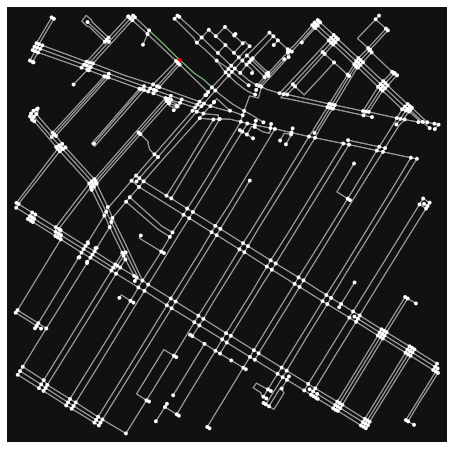

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [46]:
nid = 42796436
ec = ['#00ff00' if edge[0] == nid else '#999999' for edge in G_walk.edges(data=True)]
nc = ['r' if node == nid else 'w' for node in G_walk.nodes]
ox.plot_graph(G_walk, edge_color=ec, node_color=nc)

checking if node number is used in edges.

## Ignore simplify

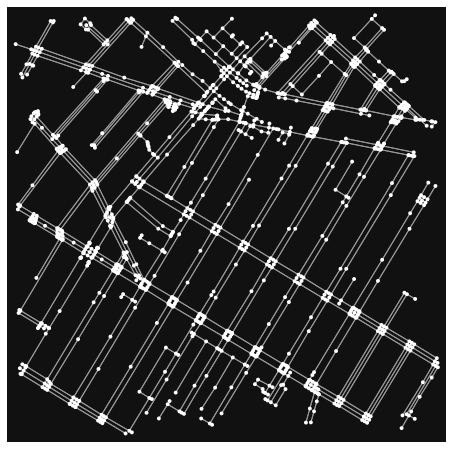

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [61]:
G_walk_full = ox.graph_from_bbox(*bbox_ox(bbox), network_type='walk', simplify=False)
G_walk_proj_full = ox.project_graph(G_walk_full)
ox.plot_graph(G_walk_proj_full)

## Export graph/geodataframe to shapefile

use [osmnx.graph_to_gdf](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_to_gdf#osmnx.utils_graph.graph_to_gdfs) and [geopandas.to_file](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html)

In [53]:
gdf = ox.graph_to_gdfs(G_walk)
display(gdf[0].head())
gdf[1].head()

,y,x,highway,street_count,geometry
osmid,,,,,
42796436,40.771085,-73.918736,traffic_signals,3,POINT (-73.91874 40.77109)
42800613,40.772059,-73.920089,traffic_signals,4,POINT (-73.92009 40.77206)
42817377,40.770791,-73.920787,NaN,3,POINT (-73.92079 40.77079)
42817383,40.769408,-73.922434,NaN,3,POINT (-73.92243 40.76941)
42817462,40.771992,-73.918891,NaN,3,POINT (-73.91889 40.77199)


osmid  oneway   lanes  \
u        v          key                                           
42796436 8612091312 0                   5702741   False       2   
         7784004949 0    [226829069, 497263582]   False  [5, 2]   
         514103140  0                 903600410   False       2   
42800613 6453007741 0                 374435107   False     NaN   
         3778245588 0                 903600410   False       2   

                                      name    highway reversed   length  \
u        v          key                                                   
42796436 8612091312 0          29th Street  secondary    False    8.134   
         7784004949 0    Hoyt Avenue South  secondary    False  102.043   
         514103140  0    Hoyt Avenue South  secondary     True  104.211   
42800613 6453007741 0          27th Street   tertiary    False    9.395   
         3778245588 0    Hoyt Avenue South  secondary    False    5.872   

                        maxspeed  \
u        v          key            
42796436 8612091312 0        NaN   
         7784004949 0     25 mph   
         514103140  0     25 mph   
42800613 6453007741 0        NaN   
         3778245588 0     25 mph   

                                                                  geometry  \
u        v          key                                                      
42796436 8612091312 0    LINESTRING (-73.91874 40.77109, -73.91879 40.7...   
         7784004949 0    LINESTRING (-73.91874 40.77109, -73.91862 40.7...   
         514103140  0    LINESTRING (-73.91874 40.77109, -73.91917 40.7...   
42800613 6453007741 0    LINESTRING (-73.92009 40.77206, -73.92016 40.7...   
         3778245588 0    LINESTRING (-73.92009 40.77206, -73.92004 40.7...   

                        bridge service access  
u        v          key                        
42796436 8612091312 0      NaN     NaN    NaN  
         7784004949 0      NaN     NaN    NaN  
         514103140  0      NaN     NaN    NaN  
42800613 6453007741 0      NaN     NaN    NaN  
         3778245588 0      NaN     NaN    NaN

In [63]:
osmid = gdf[1]['osmid']

if any(isinstance(item, list) for item in osmid):
    print("True")
else:
    print("False")

True


In [62]:
gdf_full = ox.graph_to_gdfs(G_walk_full)
osmid = gdf_full[1]['osmid']

if any(isinstance(item, list) for item in osmid):
    print("True")
else:
    print("False")

False


simplify arg in graph_from_bbox does create lists in osmid col. important because when exporting to shpfile, lists and tuples in gdf will return valueerror.

### geopandas.to_file()

In [60]:
data_path = 'Root/Projects/housing-nyc/notebooks/data/'
gdf[0].to_file(data_path + 'nodes.shp')
gdf[1].to_file(data_path + 'edges.shp')

/var/folders/3t/1t1r_w1n3fv_x52d58dpfhlc0000gn/T/ipykernel_39855/2151695474.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf[0].to_file(data_path + 'nodes.shp')


ValueError: Invalid field type <class 'list'>

In [65]:
gdf_full[0].to_file(data_path + "test.gpkg", layer='nodes', driver="GPKG")
gdf_full[1].to_file(data_path + "test.gpkg", layer='edges', driver="GPKG")

# Goal: save full walk network of nyc

In [3]:
G = ox.graph_from_place('New York City', network_type='walk', simplify=False)

took about 10-15 mins. Maybe less.

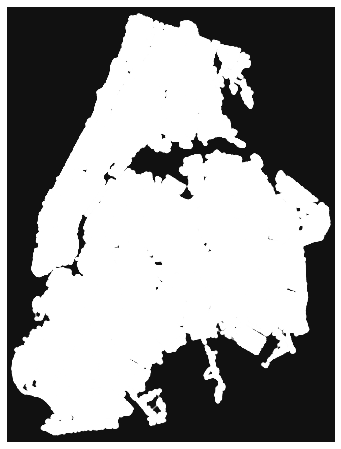

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [67]:
G_plot = ox.project_graph(G)
ox.plot_graph(G_plot)

Maybe 5 mins? Also missing staten island

In [68]:
len(G.edges)

1281650

In [69]:
len(G.nodes)

506916

In [4]:
G_si = ox.graph_from_place('Staten Island', network_type='walk', simplify=False)

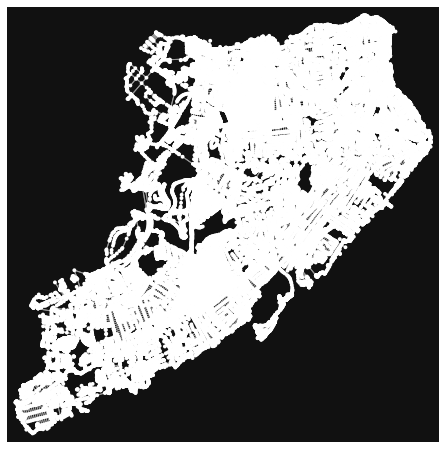

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [70]:
G_plot = ox.project_graph(G_si)
ox.plot_graph(G_plot)

## combine edges and nodes gdf

In [9]:
G.graph

{'created_date': '2022-11-27 18:28:07',
 'created_with': 'OSMnx 1.2.2',
 'crs': 'epsg:4326'}

In [8]:
print(dir(G))

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', '_pred', '_succ', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_key_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'has_predecessor', 'has_successor', 'in_degree', 'in_edges', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'new_edge_key', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'n

In [5]:
gdf = ox.graph_to_gdfs(G)
gdf_si = ox.graph_to_gdfs(G_si)

In [74]:
display(gdf[0].head())
gdf_si[0].head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30807307,40.792134,-73.962183,2,NaN,NaN,POINT (-73.96218 40.79213)
30807308,40.792024,-73.962176,2,NaN,NaN,POINT (-73.96218 40.79202)
30807309,40.791687,-73.962407,2,NaN,NaN,POINT (-73.96241 40.79169)
30807310,40.791550,-73.962498,2,NaN,NaN,POINT (-73.96250 40.79155)
30807311,40.791256,-73.962752,2,NaN,NaN,POINT (-73.96275 40.79126)


,y,x,street_count,highway,ref,geometry
osmid,,,,,,
42943494,40.630466,-74.136277,3,NaN,NaN,POINT (-74.13628 40.63047)
42943497,40.631591,-74.138371,3,traffic_signals,NaN,POINT (-74.13837 40.63159)
42943507,40.603984,-74.115377,4,NaN,NaN,POINT (-74.11538 40.60398)
42943509,40.603918,-74.117733,2,stop,NaN,POINT (-74.11773 40.60392)
42943511,40.603913,-74.117918,4,NaN,NaN,POINT (-74.11792 40.60391)


In [13]:
len(list(set(gdf[0].index) & set(gdf_si[0].index)))

0

no overalapping data it seems

In [19]:
import pandas as pd
nodes = pd.concat([gdf[0], gdf_si[0]])
edges = pd.concat([gdf[1], gdf_si[1]])

## save gdf

In [24]:
gpkg = 'notebooks/data/nycwalk.gpkg'
nodes.to_file(gpkg, layer='nodes', driver="GPKG")
edges.to_file(gpkg, layer='edges', driver="GPKG")

use ```osmnx.io.save_graph_geopackage(G, filepath=None, encoding='utf-8', directed=False)```
and ```osmnx.io.save_graph_shapefile(G, filepath=None, encoding='utf-8', directed=False)``` to save to gpkg and shp, instead of to_file, and for local dev, use graphml:

- ```osmnx.io.save_graphml(G, filepath=None, gephi=False, encoding='utf-8)```
- ```osmnx.io.load_graphml(filepath=None, graphml_str=None, node_dtypes=None, edge_dtypes=None, graph_dtypes=None```

# Check graph structure

In [14]:
g_nodes = list(G.nodes(data=True))
g_edges = list(G.edges(data=True))

display(g_nodes[0])
display(g_edges[0])

(30807307, {'y': 40.7921336, 'x': -73.962183, 'street_count': 2})

(30807307,
 4276626653,
 {'osmid': 46613689,
  'highway': 'bridleway',
  'oneway': False,
  'reversed': False,
  'length': 11.984})

# Combine nyc graphs and si graphs with gdf conversion

Should be a better save file as the graphs are natively combined in the same object type. Also had confirmed from work above that there's no overlap in osmid.

In [16]:
import networkx as nx

In [17]:
C = nx.compose(G, G_si)

In [19]:
ox.save_graphml(C, 'notebooks/data/nycwalk.graphml')

In [25]:
c = list(C.nodes(data=True))
all([bool(i[1]) for i in c])

True